In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Group_7_data_cleaned.csv")

In [3]:
df.drop(columns=['Date','Time'], inplace=True)

In [4]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

## Estimating the Occupancy of the room after removing the light input variables as per problem statement

In [6]:
X = df.drop(['Room_Occupancy_Count'], axis=1)
y = df[['Room_Occupancy_Count']]

In [7]:
df_wo_light = df.drop(df.filter(regex='Light').columns, axis=1)

In [8]:
df_wo_light.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [9]:
X_wo_light = df_wo_light.drop(['Room_Occupancy_Count'], axis=1)
y_wo_light = df_wo_light[['Room_Occupancy_Count']]

In [10]:
# Splitting the dataset into train and test
X_train_wo_light, X_test_wo_light, y_train_wo_light, y_test_wo_light = train_test_split(X_wo_light, y_wo_light, test_size=0.2, random_state=42)

In [11]:
# Scaling the dataset
scaler = StandardScaler()
X_train_scaled_wo_light = scaler.fit_transform(X_train_wo_light)
X_test_scaled_wo_light = scaler.transform(X_test_wo_light)

## New Models

### 1. SVM with Linear Kernel

In [12]:
%%time

model_class_wo_light_lk = SVC(kernel = 'linear')
model_class_wo_light_lk.fit(X_train_scaled_wo_light, y_train_wo_light)

print("Accuracy on train set: ", model_class_wo_light_lk.score(X_train_scaled_wo_light, y_train_wo_light))
print("Accuracy on test set: ", model_class_wo_light_lk.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on train set:  0.9608786869060841
Accuracy on test set:  0.9481737413622903
Wall time: 459 ms


#### Hyperparameter Tuning using GridSearch

In [13]:
%%time

# define grid search
grid = {
    "C": [0.01,0.1,1,10,100],
    "kernel": ['linear']
}


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

grid_search_lk = GridSearchCV(estimator = model_class_wo_light_lk, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy', error_score=0)

#Results
grid_result_lk = grid_search_lk.fit(X_train_scaled_wo_light, y_train_wo_light)

# summarize results
print("Best: %f using %s" % (grid_result_lk.best_score_, grid_result_lk.best_params_))
means = grid_result_lk.cv_results_['mean_test_score']
stds = grid_result_lk.cv_results_['std_test_score']
params = grid_result_lk.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960508 using {'C': 100, 'kernel': 'linear'}
0.940022 (0.004215) with: {'C': 0.01, 'kernel': 'linear'}
0.956148 (0.004137) with: {'C': 0.1, 'kernel': 'linear'}
0.958616 (0.003541) with: {'C': 1, 'kernel': 'linear'}
0.960508 (0.003630) with: {'C': 10, 'kernel': 'linear'}
0.960508 (0.003931) with: {'C': 100, 'kernel': 'linear'}
Wall time: 17.3 s


#### SVM with Linear Kernel Model with best hyperparameters

In [14]:
model_class_wo_light_lk = SVC(kernel = grid_result_lk.best_params_['kernel'], 
                              C= grid_result_lk.best_params_['C'])
model_class_wo_light_lk.fit(X_train_scaled_wo_light, y_train_wo_light)

print("Accuracy on test set: ", model_class_wo_light_lk.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on test set:  0.9496544916090819


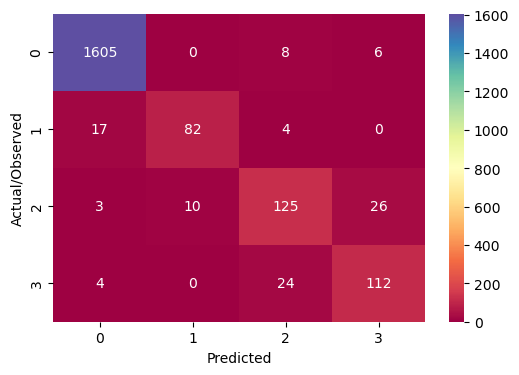

In [15]:
y_predicted_lk = model_class_wo_light_lk.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted_lk)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [16]:
print(classification_report(y_test_wo_light, y_predicted_lk))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1619
           1       0.89      0.80      0.84       103
           2       0.78      0.76      0.77       164
           3       0.78      0.80      0.79       140

    accuracy                           0.95      2026
   macro avg       0.86      0.84      0.85      2026
weighted avg       0.95      0.95      0.95      2026



In [17]:
# Saving the model with pickle

filename = 'svm_lk_classification_model.sav'
pickle.dump(model_class_wo_light_lk, open(filename, 'wb'))

In [18]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted_lk)
weighted_precision = precision_score(y_test_wo_light, y_predicted_lk, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted_lk, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted_lk, average='weighted')

# Creating an evaluation metrics dataframe for the model
results = pd.DataFrame([['SVM with Linear Kernel', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM with Linear Kernel,94.97,94.92,94.97,94.93


### 2. SVM with Non-linear Kernel

In [19]:
%%time

model_class_wo_light_nlk = SVC(kernel = 'rbf')
model_class_wo_light_nlk.fit(X_train_scaled_wo_light, y_train_wo_light)

print("Accuracy on train set: ", model_class_wo_light_nlk.score(X_train_scaled_wo_light, y_train_wo_light))
print("Accuracy on test set: ", model_class_wo_light_nlk.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on train set:  0.9809946933234605
Accuracy on test set:  0.9674234945705824
Wall time: 1.16 s


#### Hyperparameter Tuning using GridSearch

In [20]:
%%time

# define grid search
grid = {
    "C": [0.01,0.1,1,10,100],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ['poly','rbf']
}


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

grid_search_nlk = GridSearchCV(estimator=model_class_wo_light_nlk, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy', error_score=0)

#Results
grid_result_nlk = grid_search_nlk.fit(X_train_scaled_wo_light, y_train_wo_light)

# summarize results
print("Best: %f using %s" % (grid_result_nlk.best_score_, grid_result_nlk.best_params_))
means = grid_result_nlk.cv_results_['mean_test_score']
stds = grid_result_nlk.cv_results_['std_test_score']
params = grid_result_nlk.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977457 using {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.972932 (0.003350) with: {'C': 0.01, 'gamma': 1, 'kernel': 'poly'}
0.815624 (0.000217) with: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.926118 (0.003760) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
0.875684 (0.001919) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.818915 (0.001228) with: {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}
0.859394 (0.003372) with: {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.815624 (0.000217) with: {'C': 0.01, 'gamma': 0.001, 'kernel': 'poly'}
0.815624 (0.000217) with: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.815624 (0.000217) with: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'poly'}
0.815624 (0.000217) with: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.973960 (0.003767) with: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
0.896623 (0.003571) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.955366 (0.003461) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
0.952281 (0.004793) with: {'C':

#### SVM with Non-Linear Kernel Model with best hyperparameters

In [21]:
model_class_wo_light_nlk = SVC(kernel = grid_result_nlk.best_params_['kernel'], 
                               C = grid_result_nlk.best_params_['C'],
                               gamma = grid_result_nlk.best_params_['gamma'],
                              )
model_class_wo_light_nlk.fit(X_train_scaled_wo_light, y_train_wo_light)

print("Accuracy on test set: ", model_class_wo_light_nlk.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on test set:  0.9782823297137216


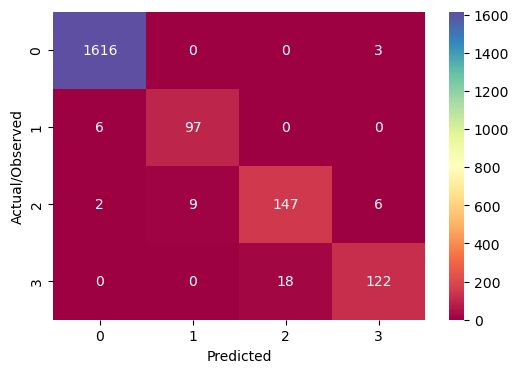

In [22]:
y_predicted_nlk = model_class_wo_light_nlk.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted_nlk)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [23]:
print(classification_report(y_test_wo_light, y_predicted_nlk))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.92      0.94      0.93       103
           2       0.89      0.90      0.89       164
           3       0.93      0.87      0.90       140

    accuracy                           0.98      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.98      0.98      0.98      2026



In [24]:
# Saving the model with pickle
filename = 'svm_nlk_classification_model.sav'
pickle.dump(model_class_wo_light_nlk, open(filename, 'wb'))

In [25]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted_nlk)
weighted_precision = precision_score(y_test_wo_light, y_predicted_nlk, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted_nlk, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted_nlk, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['SVM with Non-Linear Kernel', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM with Linear Kernel,94.97,94.92,94.97,94.93
1,SVM with Non-Linear Kernel,97.83,97.82,97.83,97.81


### 3. Deep Learning Model

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
%%time

# Define the MLP classifier with 4 hidden layers of 50 neurons each
model_class_wo_light_mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50, 50))
model_class_wo_light_mlp.fit(X_train_scaled_wo_light, y_train_wo_light)

print("Accuracy on train set: ", model_class_wo_light_mlp.score(X_train_scaled_wo_light, y_train_wo_light))
print("Accuracy on test set: ", model_class_wo_light_mlp.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on train set:  0.9988893002591632
Accuracy on test set:  0.9837117472852912
Wall time: 6.76 s


#### Hyperparameter Tuning using GridSearch

In [28]:
%%time

# define grid search
grid = {
    "hidden_layer_sizes": [(10,10), (10,10,10), (10,10,10,10),
                           (20,20), (20,20,20), (20,20,20,20),
                           (50,50), (50,50,50), (50,50,50,50),
                           (100,100), (100,100,100), (100,100,100,100)],
    "solver": ['sgd', 'adam'],
    "learning_rate": ['constant', 'adaptive']
}


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

grid_search_mlp = GridSearchCV(estimator=model_class_wo_light_mlp, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy', error_score=0)

#Results
grid_result_mlp = grid_search_mlp.fit(X_train_scaled_wo_light, y_train_wo_light)

# summarize results
print("Best: %f using %s" % (grid_result_mlp.best_score_, grid_result_mlp.best_params_))
means = grid_result_mlp.cv_results_['mean_test_score']
stds = grid_result_mlp.cv_results_['std_test_score']
params = grid_result_mlp.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.984615 using {'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'adam'}
0.944423 (0.009139) with: {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.974001 (0.004747) with: {'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.940844 (0.010554) with: {'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.974125 (0.005385) with: {'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.941833 (0.012410) with: {'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.974084 (0.004386) with: {'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.943231 (0.009459) with: {'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.975359 (0.005809) with: {'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.940558 (0.012074) with: {'hidden_la

#### Deep Learning Model with best hyperparameters

In [29]:
model_class_wo_light_mlp = MLPClassifier(hidden_layer_sizes = grid_result_mlp.best_params_['hidden_layer_sizes'], 
                                         solver = grid_result_mlp.best_params_['solver'],
                                         learning_rate = grid_result_mlp.best_params_['learning_rate'],
                              )
model_class_wo_light_mlp.fit(X_train_scaled_wo_light, y_train_wo_light)

print("Accuracy on test set: ", model_class_wo_light_mlp.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on test set:  0.983218163869694


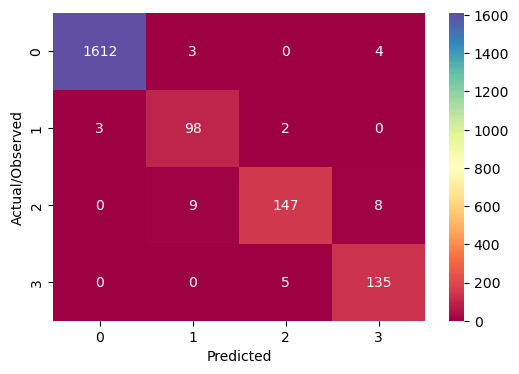

In [30]:
y_pred_mlp = model_class_wo_light_mlp.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_pred_mlp)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [31]:
print(classification_report(y_test_wo_light, y_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.89      0.95      0.92       103
           2       0.95      0.90      0.92       164
           3       0.92      0.96      0.94       140

    accuracy                           0.98      2026
   macro avg       0.94      0.95      0.95      2026
weighted avg       0.98      0.98      0.98      2026



In [32]:
# Saving the model with pickle
filename = 'mlp_classification_model.sav'
pickle.dump(model_class_wo_light_mlp, open(filename, 'wb'))

In [33]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_pred_mlp)
weighted_precision = precision_score(y_test_wo_light, y_pred_mlp, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_pred_mlp, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_pred_mlp, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Deep Learning Model', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM with Linear Kernel,94.97,94.92,94.97,94.93
1,SVM with Non-Linear Kernel,97.83,97.82,97.83,97.81
2,Deep Learning Model,98.32,98.36,98.32,98.33
